In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy import *

In [109]:
df = pd.read_csv("/Users/lucasgomesmaddalena/Library/CloudStorage/OneDrive-Pessoal/Documentos/PUC 22.2/healthcare silvio/sepsis/sih_aih_sepsis_2011_2020.csv")
pop = pd.Series({2011: 196603732, 2012: 198314934,
       2013: 200004188, 2014: 201717541, 2015: 203475683,
       2016: 205156587, 2017: 206804741, 2018: 208494900,
       2019: 210147125, 2020: 211755692})

In [110]:
df.head()

,id,estado,regiao,munic_res,sexo,raca_cor,idade_real_anos,los_hosp,los_uti,uti,morte,cnes,diag_princ_trim_upper,proc_rea,ano_inter,mes_inter,date_inter,date_saida,idade_grupo_who
0,7943841,BA,NE,292510,1,3,67,8,0,0,1,2601583,A419,303010037,2013,4,2013-04-02,2013-04-10,65-69
1,7943092,BA,NE,292740,1,99,79,31,0,0,1,4294,A403,303010037,2013,6,2013-06-18,2013-07-19,75-79
2,7943312,BA,NE,293330,1,99,2,16,2,1,0,2402076,A419,303010037,2013,6,2013-06-09,2013-06-25,0-4
3,7942962,BA,NE,292740,1,3,0,14,13,1,0,3956369,P369,303160020,2013,5,2013-05-21,2013-06-04,0-4
4,7943388,BA,NE,293360,1,99,53,7,0,0,0,2601729,A419,303010037,2013,7,2013-07-05,2013-07-12,50-54


In [111]:
incidence = 100000 * df.groupby("ano_inter").count()["id"] / pop
mortality = 100000 * df[df["morte"] == 1].groupby("ano_inter").count()["id"] / pop
lethality = 100 * mortality / incidence

# Graphics Update

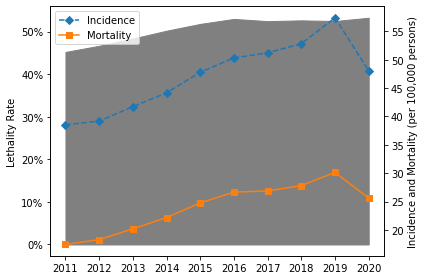

In [112]:
fig, ax1 = plt.subplots(sharey = True)

ax1.fill_between(x = lethality.index,
                 y1 = 0,
                 y2 = lethality,
                 color = 'grey')
ax1.tick_params(axis='y')
ax1.set_ylabel('Lethality Rate')
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))


ax2 = ax1.twinx()


ax2.plot(incidence.index,incidence,
         label = 'Incidence',
         marker = 'D',
         linestyle = '--')

ax2.plot(mortality.index, mortality,
         label = 'Mortality',
         marker = 's')

ax2.set_ylabel('Incidence and Mortality (per 100,000 persons)')
plt.yticks([5*i for i in range(12)])
ax2.legend()

plt.xticks([i for i in range(2011,2021)])

plt.plot()


fig.tight_layout()

plt.show()

# Tables Update

## Table 1

In [113]:
columns = ["2011-2011","2012-2013","2014-2015",
           "2016-2017","2018-2019","2020-2020"]


In [131]:
incidence = [len(df[df.ano_inter.isin([int(years[0:4]),int(years[5:10])])]) for years in columns]

male = [100000 * len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])]) &
                         (df.sexo == 1))])/
        pop[int(years[0:4])] for years in columns]

female = [100000 * len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])]) &
                           (df.sexo == 3))])/
          pop[int(years[0:4])] for years in columns]                   

_0_17 = [len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])]) &
                 (df.idade_real_anos <= 17))]) for years in columns]

_18_64 = [len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])]) &
                  (df.idade_real_anos >= 18) &
                  (df.idade_real_anos <= 65))]) for years in columns]

_65_84 = [len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])]) &
                  (df.idade_real_anos >= 65) &
                  (df.idade_real_anos <= 84))]) for years in columns]

_85_ = [len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])])) &
                  (df.idade_real_anos >= 85)]) for years in columns]

mean_age = [df[df.ano_inter.isin([int(years[0:4]),int(years[5:10])])].idade_real_anos.mean() for years in columns]

white = [len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])])) &
                  (df.raca_cor == 1)]) for years in columns]

black = [len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])])) &
                  (df.raca_cor == 2)]) for years in columns]

yellow = [len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])])) &
                  (df.raca_cor == 3)]) for years in columns]

indigenous = [len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])])) &
                  (df.raca_cor == 4)]) for years in columns]

no_info = [len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])])) &
                  (df.raca_cor == 99)]) for years in columns]

death_cases = [len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])])) &
                  (df.morte == 1)]) for years in columns]

mortality = [100000 * len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])])) &
                             (df.morte == 1)])/pop[int(years[0:4])] for years in columns]

lethality = [death_cases[i]/incidence[i]) for i in range(len(death_cases))]

ICU_death_cases = [len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])])) &
                          (df.morte == 1) &
                          (df.uti == 1)]) for years in columns]

ICU_cases = [len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])])) &
                    (df.uti == 1)]) for years in columns]

ICU_lethality = [ICU_death_cases[i]/ICU_cases[i] for i in range(len(ICU_cases))]

private_incidence =[len(df[(df.ano_inter.isin([int(years[0:4]),int(years[5:10])])) &
                           (df. == 1)]) for years in columns]

public_incidente =